In [1]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8159507963888391174
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4930941747
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9871631794335019068
physical_device_desc: "device: 0, name: GeForce GTX 1060, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


'2.1.0'

In [2]:
DATA_LIST = os.listdir('all/train')
DATASET_PATH  = 'all/train'
TEST_DIR =  'all/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 100
LEARNING_RATE = 0.0001 # start off with high rate first 0.001 and experiment with reducing it gradually 

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')


train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="categorical")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,class_mode="categorical")

Found 216 images belonging to 4 classes.
Found 54 images belonging to 4 classes.


C:\Users\tanzi\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:341: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


In [4]:
# raise NotImplementedError("Build your model based on an architecture of your choice "
#                           "A sample model summary is shown below")

# Implement VGG16
# from tensorflow.keras.applications.resnet_v2 import ResNet152V2
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

xception_model = tf.keras.applications.xception.Xception(include_top=False, weights='imagenet', input_shape=(224, 224, 3), pooling='None', classes=4)
            
xception_model.trainable = False

covid_model = Sequential()
covid_model.add(xception_model)
covid_model.add(Flatten())
covid_model.add(Dense(1024, activation='relu'))
covid_model.add(Dense(256, activation='relu'))
covid_model.add(Dense(4, activation='sigmoid'))

covid_model.build(input_shape=(224, 224, 3))
covid_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 7, 7, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               25690368  
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 1028      
Total params: 46,552,876
Trainable params: 25,691,396
Non-trainable params: 20,861,480
_________________________________________________________________


In [5]:
# FIT MODEL
from tensorflow.keras.optimizers import SGD
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

# raise NotImplementedError("Use the model.fit function to train your network")
# covid_model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
covid_model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), metrics=['accuracy'])
# print the device library
print(device_lib.list_local_devices())

history = None

with tf.device("GPU:0"):
    history = covid_model.fit_generator(generator=train_batches, 
                              steps_per_epoch=STEP_SIZE_TRAIN, 
                              epochs=100, 
                              validation_data=(valid_batches),
                              validation_steps=STEP_SIZE_VALID)

22
6
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13834887943123615445
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4930941747
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2883343681923543584
physical_device_desc: "device: 0, name: GeForce GTX 1060, pci bus id: 0000:01:00.0, compute capability: 6.1"
]
Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']


C:\Users\tanzi\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\tanzi\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


  ...
    to  
  ['...']
Train for 21 steps, validate for 5 steps
Epoch 1/100


C:\Users\tanzi\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\tanzi\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


21/21 [==============================] - 10s 454ms/step - loss: 2.7298 - accuracy: 0.6638 - val_loss: 2.1154 - val_accuracy: 0.6450
Epoch 2/100
21/21 [==============================] - 6s 278ms/step - loss: 0.9965 - accuracy: 0.7536 - val_loss: 1.8078 - val_accuracy: 0.6600
Epoch 3/100
21/21 [==============================] - 6s 278ms/step - loss: 0.9998 - accuracy: 0.7646 - val_loss: 2.0751 - val_accuracy: 0.6750
Epoch 4/100
21/21 [==============================] - 6s 277ms/step - loss: 0.8376 - accuracy: 0.7682 - val_loss: 1.4178 - val_accuracy: 0.6950
Epoch 5/100
21/21 [==============================] - 6s 280ms/step - loss: 0.6885 - accuracy: 0.7900 - val_loss: 1.6948 - val_accuracy: 0.6800
Epoch 6/100
21/21 [==============================] - 6s 278ms/step - loss: 0.5256 - accuracy: 0.8058 - val_loss: 1.5791 - val_accuracy: 0.6450
Epoch 7/100
21/21 [==============================] - 6s 275ms/step - loss: 0.5115 - accuracy: 0.7743 - val_loss: 0.9192 - val_accuracy: 0.6800
Epoch 8/10

21/21 [==============================] - 6s 285ms/step - loss: 0.3015 - accuracy: 0.8689 - val_loss: 0.4776 - val_accuracy: 0.7850
Epoch 59/100
21/21 [==============================] - 7s 311ms/step - loss: 0.2927 - accuracy: 0.8738 - val_loss: 0.5798 - val_accuracy: 0.7350
Epoch 60/100
21/21 [==============================] - 6s 285ms/step - loss: 0.2847 - accuracy: 0.8799 - val_loss: 0.7044 - val_accuracy: 0.7050
Epoch 61/100
21/21 [==============================] - 6s 289ms/step - loss: 0.2655 - accuracy: 0.8823 - val_loss: 0.6165 - val_accuracy: 0.7100
Epoch 62/100
21/21 [==============================] - 6s 284ms/step - loss: 0.2409 - accuracy: 0.8956 - val_loss: 0.8223 - val_accuracy: 0.6750
Epoch 63/100
21/21 [==============================] - 6s 290ms/step - loss: 0.2106 - accuracy: 0.9150 - val_loss: 0.9711 - val_accuracy: 0.7050
Epoch 64/100
21/21 [==============================] - 6s 303ms/step - loss: 0.2550 - accuracy: 0.8811 - val_loss: 0.8289 - val_accuracy: 0.7300
Epoch

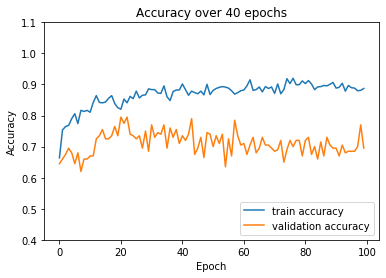

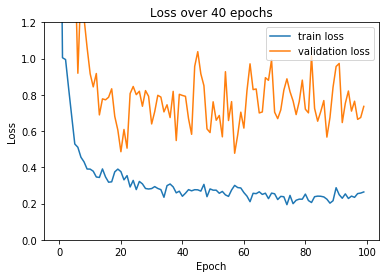

In [6]:
import matplotlib.pyplot as plt

# raise NotImplementedError("Plot the accuracy and the loss during training")

# Accuracy over 40 Epochs
plt.figure()
plt.plot(history.history['accuracy'], label='train accuracy') 
plt.plot(history.history['val_accuracy'], label = 'validation accuracy') 
plt.title('Accuracy over 40 epochs')
plt.xlabel('Epoch') 
plt.ylabel('Accuracy') 
plt.ylim([0.4, 1.1]) 
plt.legend(loc='lower right')

# Loss over 40 Epochs
plt.figure()
plt.plot(history.history['loss'], label='train loss') 
plt.plot(history.history['val_loss'], label = 'validation loss') 
plt.title('Loss over 40 epochs')
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.ylim([0, 1.2]) 
plt.legend(loc='upper right')

In [7]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="categorical")
eval_generator.reset()
print(len(eval_generator))
x = covid_model.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Test loss:' , x[0])
print('Test accuracy:',x[1])

Found 36 images belonging to 4 classes.
36
Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']
36/36 [==============================] - 1s 27ms/step - loss: 0.4573 - accuracy: 0.7847
Test loss: 0.4572942383755516
Test accuracy: 0.7847222


Found 270 images belonging to 4 classes.
Instructions for updating:
Please use Model.predict, which supports generators.
270/270 [==============================] - 6s 22ms/step
(270, 256)
(270, 2)


Text(0.5, 1.0, '2D features')

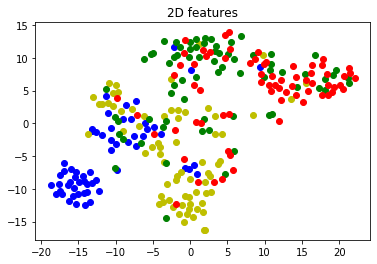

In [8]:
from sklearn.manifold import TSNE

intermediate_layer_model = tf.keras.models.Model(inputs=covid_model.input,
                                        outputs=covid_model.get_layer('dense').output)

tsne_eval_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="categorical")

# raise NotImplementedError("Extract features from the tsne_data_generator and fit a t-SNE model for the features,"
#                           "and plot the resulting 2D features of the four classes.")

outputs = intermediate_layer_model.predict_generator(tsne_eval_generator,270,verbose=1)
print(outputs.shape)
label = tsne_eval_generator.classes
features = TSNE(n_components=2).fit_transform(outputs)
print(features.shape)
plt.figure()
for index in range(len(features)):
    if label[index] == 0:
        # COVID
        plt.plot(features[index, 0], features[index, 1], 'bo')
    elif label[index] == 1:
        # normal
        plt.plot(features[index, 0], features[index, 1], 'yo')
    elif label[index] == 2:
        # Pneumonia_bac
        plt.plot(features[index, 0], features[index, 1], 'go')
    else:
        # Pneumonia_vir
        plt.plot(features[index, 0], features[index, 1], 'ro')
plt.title('2D features')